# Influence of Weather on the bixi system

The purpose of this notebook is to try to make correlation and draw conclusion between weather factors and bike use. We'll try to suppress other factors (such as increasing popularity of bikeshare, increasing number of bike, season's influence on people's mind, ...) as much as possible.

# Increasing popularity of the bixi system

Let's visualise the evolution of the utilisation of the bike

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
import matplotlib.dates as mdates
import datetime

In [2]:
# Do not run this cell

# loads the combined dataset
data = pd.read_pickle("../combined_data")
data.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,latitude_start,longitude_start,latitude_end,longitude_end,year,month,start_day,start_hour,end_day,end_hour,distance
0,2014-04-15 00:01:00,6209,2014-04-15 00:18:00,6436,1061,1,45.512520,-73.570620,45.486452,-73.595234,2014,4,15,0,15,0,3.475949
1,2014-04-15 00:01:00,6214,2014-04-15 00:11:00,6248,615,1,45.517350,-73.569060,45.518593,-73.581566,2014,4,15,0,15,0,0.984131
2,2014-04-15 00:01:00,6164,2014-04-15 00:18:00,6216,1031,1,45.532955,-73.584194,45.514960,-73.585030,2014,4,15,0,15,0,2.002019
3,2014-04-15 00:01:00,6214,2014-04-15 00:24:00,6082,1382,1,45.517350,-73.569060,45.550613,-73.582883,2014,4,15,0,15,0,3.852206
4,2014-04-15 00:02:00,6149,2014-04-15 00:08:00,6265,347,1,45.538670,-73.569360,45.539259,-73.577338,2014,4,15,0,15,0,0.624798


In [3]:
# Do not run this cell

# We keep only date, using the start date as the reference date.
df = data[['year','month','start_day']]
df.year = df.year.map(str) + '-' + df.month.map(str) + '-' + df.start_day.map(str)
df = df[['year']]

# Conversion of date to datetime
df['datetime'] = df.apply(lambda row: datetime.datetime.strptime(row['year'], '%Y-%m-%d'), axis=1)

df = df[['datetime']]
df = df.rename(columns={'datetime': 'date'})

#Number of biketravel per day
Daily_BikeCount = df.groupby(['date']).size().reset_index(name='count')
Daily_BikeCount.head()

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date
0,2014-04-15
1,2014-04-15
2,2014-04-15
3,2014-04-15
4,2014-04-15


Some dates are missing, as bike service is closed from the 1rst of October to the 15th of April.
We create another dataframe in order to put a 0 value to these dates.

In [81]:
# create an array of 1995 dates starting at '2014-04-15', one per day
rng = pd.date_range('2014-04-15', periods=1995, freq='D')
calendar = pd.DataFrame({ 'date': rng, 'Count' : 0 }) 
calendar

,date,Count
0,2014-04-15,0
1,2014-04-16,0
2,2014-04-17,0
3,2014-04-18,0
4,2014-04-19,0
...,...,...
1990,2019-09-26,0
1991,2019-09-27,0
1992,2019-09-28,0
1993,2019-09-29,0


In [6]:
# Do not run this cell

# We merge the two dataframe in order to include missing date
Daily_BikeTravel = pd.merge(Daily_BikeCount, calendar, how='outer', on=None, left_on='date', right_on='date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

Daily_BikeTravel.drop(['Count'],axis='columns', inplace=True)

# We fill the missing values
Daily_BikeTravel = Daily_BikeTravel.fillna(0)

# save the file to pickle because it takes too much time
Daily_BikeTravel.to_pickle("../DailyBikeTravel") 

In [3]:
Daily_BikeTravel = pd.read_pickle("../DailyBikeTravel")
Daily_BikeTravel.head()

,date,count
0,2014-04-15,1577.0
1,2014-04-16,3180.0
2,2014-04-17,5852.0
3,2014-04-18,5325.0
4,2014-04-19,6031.0


We plot the evolution of bike use over time.

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'number of 10^4 bike travel of the day ')

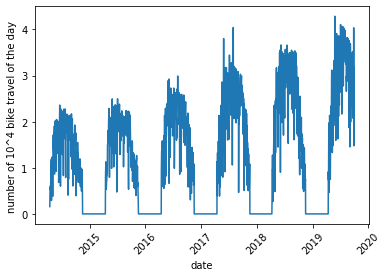

In [4]:
plt.plot(Daily_BikeTravel['date'],Daily_BikeTravel['count']/10000)
plt.xticks(rotation = 45);

axes = plt.gca()
axes.set_xlabel('date')
axes.set_ylabel('number of 10^4 bike travel of the day ')

The same plot can be done considering only month.

In [7]:
# Do not run this cell

# Number of biketravel per month
df = data[['year','month','start_day']]
df.year = df.year.map(str) + '-' + df.month.map(str)
df = df[['year']]

# Conversion to datetime
df['datetime'] = df.apply(lambda row: datetime.datetime.strptime(row['year'], '%Y-%m'), axis=1)

df = df[['datetime']]
df = df.rename(columns={'datetime': 'date'})

# Number of bike per month
Monthly_BikeCount = df.groupby(['date']).size().reset_index(name='count')

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
# create an array of 66 dates starting at '2014-04', one per month
month_rng = pd.date_range('2014-04', periods=66, freq='MS')
month_calendar = pd.DataFrame({ 'date': month_rng, 'Count' : 0 }) 

In [10]:
# Do not run this cell

# We merge the two dataframe in order to include missing date
Monthly_BikeTravel = pd.merge(Monthly_BikeCount, month_calendar, how='outer', on=None, left_on='date', 
                              right_on='date', left_index=False, right_index=False, sort=True, 
                              suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

Monthly_BikeTravel.drop(['Count'],axis='columns', inplace=True)

# We fill the missing values
Monthly_BikeTravel = Monthly_BikeTravel.fillna(0)

# save the file to pickle because it takes too much time
Monthly_BikeTravel.to_pickle("../MonthlyBikeTravel")

In [6]:
Monthly_BikeTravel = pd.read_pickle("../MonthlyBikeTravel")
Monthly_BikeTravel.head()

,date,count
0,2014-04-01,108264.0
1,2014-05-01,455261.0
2,2014-06-01,525863.0
3,2014-07-01,569352.0
4,2014-08-01,556780.0


Text(0, 0.5, 'number of 10^4 bike travel of the month ')

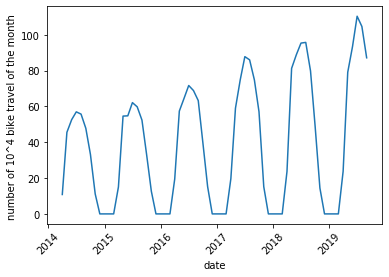

In [7]:
plt.plot(Monthly_BikeTravel['date'],Monthly_BikeTravel['count']/10000)
plt.xticks(rotation = 45);

axes = plt.gca()
axes.set_xlabel('date')
axes.set_ylabel('number of 10^4 bike travel of the month ')

We clearly see the effect of the cycle of season.
Bikes are not used between november and april.
Also as expected, bikes are more and more used.

## Normalization of the data

To try to suppress this tendency, we normalize the number of bike travel by the number of bike travel per year.

In [13]:
# Do not run this cell

# Number of biketravel per year
df = data[['year','month','start_day']]
df.year = df.year.map(str)
df = df[['year']]

# Conversion to datetime
df['datetime'] = df.apply(lambda row: datetime.datetime.strptime(row['year'], '%Y'), axis=1)

df = df[['datetime']]
df = df.rename(columns={'datetime': 'date'})

# Number of bike per year
Annual_BikeTravel = df.groupby(['date']).size().reset_index(name='count')

# save the file to pickle because it takes too much time
Annual_BikeTravel.to_pickle("../Annual_BikeTravel") # where to save it usually as a .plk

In [8]:
Annual_BikeTravel = pd.read_pickle("../Annual_BikeTravel")
Annual_BikeTravel

,date,count
0,2014-01-01,3136276
1,2015-01-01,3443883
2,2016-01-01,4000080
3,2017-01-01,4740357
4,2018-01-01,5277541
5,2019-01-01,4980650


In [9]:
year_2014 = Monthly_BikeTravel['date'].dt.year == 2014
data_2014 = Monthly_BikeTravel[year_2014]
data_2014['count'] = data_2014['count'].apply(lambda x: x/3136276)
data_2014 = data_2014.rename(columns={'count': 'normalized_count'})

year_2015 = Monthly_BikeTravel['date'].dt.year == 2015
data_2015 = Monthly_BikeTravel[year_2015]
data_2015['count'] = data_2015['count'].apply(lambda x: x/3443883)
data_2015 = data_2015.rename(columns={'count': 'normalized_count'})

year_2016 = Monthly_BikeTravel['date'].dt.year == 2016
data_2016 = Monthly_BikeTravel[year_2016]
data_2016['count'] = data_2016['count'].apply(lambda x: x/4000080)
data_2016 = data_2016.rename(columns={'count': 'normalized_count'})

year_2017 = Monthly_BikeTravel['date'].dt.year == 2017
data_2017 = Monthly_BikeTravel[year_2017]
data_2017['count'] = data_2017['count'].apply(lambda x: x/4740357)
data_2017 = data_2017.rename(columns={'count': 'normalized_count'})

year_2018 = Monthly_BikeTravel['date'].dt.year == 2018
data_2018 = Monthly_BikeTravel[year_2018]
data_2018['count'] = data_2018['count'].apply(lambda x: x/5277541)
data_2018 = data_2018.rename(columns={'count': 'normalized_count'})

year_2019 = Monthly_BikeTravel['date'].dt.year == 2019
data_2019 = Monthly_BikeTravel[year_2019]
data_2019['count'] = data_2019['count'].apply(lambda x: x/4980650)
data_2019 = data_2019.rename(columns={'count': 'normalized_count'})

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [10]:
Normalized_MonthlyBike = pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018,data_2019])

Normalized_MonthlyBike.head()

,date,normalized_count
0,2014-04-01,0.034520
1,2014-05-01,0.145160
2,2014-06-01,0.167671
3,2014-07-01,0.181538
4,2014-08-01,0.177529


Text(0, 0.5, 'bike travel normalized by year')

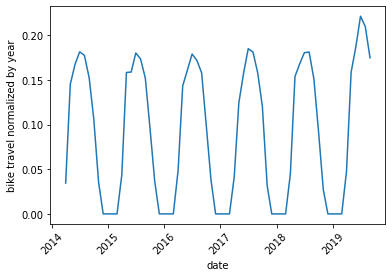

In [11]:
plt.plot(Normalized_MonthlyBike['date'],Normalized_MonthlyBike['normalized_count'])
plt.xticks(rotation = 45);

axes = plt.gca()
axes.set_xlabel('date')
axes.set_ylabel('bike travel normalized by year')

Except 2019, we see that the amplitude is approximately the same for each year. Now we can consider the influence of the weather without worrying about the increase in use due to the bixi system becoming popular.

# The weather dataset

We want to analyze the influence of weather on the use of the bikeshare system.

## Cleaning of the dataset

In [68]:
weather_2014 = pd.read_csv(r"WeatherData\2014.csv",sep = ',')
weather_2015 = pd.read_csv(r"WeatherData\2015.csv",sep = ',')
weather_2016 = pd.read_csv(r"WeatherData\2016.csv",sep = ',')
weather_2017 = pd.read_csv(r"WeatherData\2017.csv",sep = ',')
weather_2018 = pd.read_csv(r"WeatherData\2018.csv",sep = ',')
weather_2019 = pd.read_csv(r"WeatherData\2019.csv",sep = ',')

data = pd.concat([weather_2014,weather_2015,weather_2016,weather_2017,weather_2018,weather_2019])

data.head()

,Longitude (x),Latitude (y),Nom de la Station,ID climatologique,Date/Heure,Année,Mois,Jour,Qualité des Données,Temp max.(°C),...,Neige tot. (cm),Neige tot. Indicateur,Précip. tot. (mm),Précip. tot. Indicateur,Neige au sol (cm),Neige au sol Indicateur,Dir. raf. max. (10s deg),Dir. raf. max. Indicateur,Vit. raf. max. (km/h),Vit. raf. max. Indicateur
0,"-73,58","45,50",MCTAVISH,7024745,2014-01-01,2014,1,1,NaN,"-15,2",...,NaN,M,"0,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
1,"-73,58","45,50",MCTAVISH,7024745,2014-01-02,2014,1,2,NaN,"-22,3",...,NaN,M,"0,0",NaN,NaN,NaN,3.0,NaN,37,NaN
2,"-73,58","45,50",MCTAVISH,7024745,2014-01-03,2014,1,3,NaN,"-19,0",...,NaN,M,"1,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
3,"-73,58","45,50",MCTAVISH,7024745,2014-01-04,2014,1,4,NaN,"-6,6",...,NaN,M,"0,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
4,"-73,58","45,50",MCTAVISH,7024745,2014-01-05,2014,1,5,NaN,"0,2",...,NaN,M,"8,0",NaN,NaN,NaN,NaN,NaN,<31,NaN


In [69]:
# Selection of useful data
df_weather = data[['Date/Heure','Temp moy.(°C)','Précip. tot. (mm)', 'Neige au sol (cm)', 'Vit. raf. max. (km/h)']]

# Conversion to datetime
df_weather['datetime'] = df_weather.apply(lambda row: datetime.datetime.strptime(row['Date/Heure'], '%Y-%m-%d'), 
                        axis=1)
df_weather = df_weather.rename(columns={'datetime': 'Date'})
df_weather.drop(['Date/Heure'],axis='columns', inplace=True)

df_weather.head()

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Temp moy.(°C),Précip. tot. (mm),Neige au sol (cm),Vit. raf. max. (km/h),Date
0,"-19,6","0,0",NaN,<31,2014-01-01
1,"-24,9","0,0",NaN,37,2014-01-02
2,"-21,3","1,0",NaN,<31,2014-01-03
3,"-14,0","0,0",NaN,<31,2014-01-04
4,"-5,2","8,0",NaN,<31,2014-01-05


In [70]:
# Temperature care 

# Conversion of string into float
df_temp = df_weather [['Date','Temp moy.(°C)']]
df_temp = df_temp.dropna()

# This conversion function need all NaN to be suppressed
df_temp['Mean temp (°C)'] = df_temp.apply(lambda row: float(row['Temp moy.(°C)'].replace(',','.')), axis=1)
df_temp.drop(['Temp moy.(°C)'],axis='columns', inplace=True)

# Put again the missing date
df_temp = pd.merge(df_temp, calendar, how='outer', on=None, left_on='Date', right_on='date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

df_temp.drop(['Count'],axis='columns', inplace=True)
df_temp.drop(['date'],axis='columns', inplace=True)

# Fill the missing value with value of the day before
df_temp.fillna(method='pad')

df_temp.head()

,Date,Mean temp (°C)
0,2014-01-01,-19.6
1,2014-01-02,-24.9
2,2014-01-03,-21.3
3,2014-01-04,-14.0
4,2014-01-05,-5.2


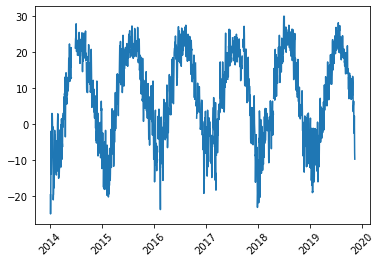

In [71]:
# Visualisation of data

plt.plot(df_temp['Date'],df_temp['Mean temp (°C)'])
plt.xticks(rotation = 45);

# Have to take care of missing values 

In [72]:
# same for precipitation

# Conversion of string into float
df_rain = df_weather [['Date','Précip. tot. (mm)']]
df_rain = df_rain.dropna()

# This conversion function need all NaN to be suppressed
df_rain['Tot precip (mm)'] = df_rain.apply(lambda row: float(row['Précip. tot. (mm)'].replace(',','.')), axis=1)
df_rain.drop(['Précip. tot. (mm)'],axis='columns', inplace=True)

# Put again the missing date
df_rain = pd.merge(df_rain, calendar, how='outer', on=None, left_on='Date', right_on='date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

df_rain.drop(['Count'],axis='columns', inplace=True)
df_rain.drop(['date'],axis='columns', inplace=True)

# Fill the missing value with value of the day before
df_rain.fillna(method='pad')

df_rain.head()

,Date,Tot precip (mm)
0,2014-01-01,0.0
1,2014-01-02,0.0
2,2014-01-03,1.0
3,2014-01-04,0.0
4,2014-01-05,8.0


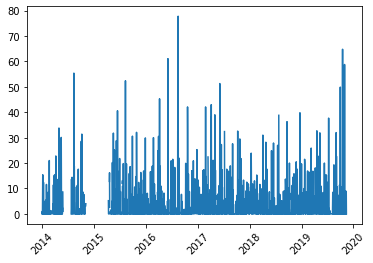

In [73]:
# Visualisation of data

plt.plot(df_rain['Date'],df_rain['Tot precip (mm)'])
plt.xticks(rotation = 45);

In [94]:
# snow type is already float
df_snow = df_weather [['Date','Neige au sol (cm)']]

# change le nom
df_snow = df_snow.rename(columns={'Neige au sol (cm)': 'Snow on ground (cm)'})

# Fill the missing value with 0
df_snow = df_snow.fillna(0)

df_snow

,Date,Snow on ground (cm)
0,2014-01-01,0.0
1,2014-01-02,0.0
2,2014-01-03,0.0
3,2014-01-04,0.0
4,2014-01-05,0.0
...,...,...
360,2019-12-27,0.0
361,2019-12-28,0.0
362,2019-12-29,0.0
363,2019-12-30,0.0


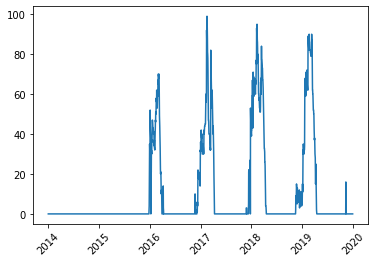

In [75]:
# Visualisation of data

plt.plot(df_snow['Date'],df_snow['Snow on ground (cm)'])
plt.xticks(rotation = 45);

In [91]:
# fix the wind max speed
df_wind = df_weather [['Date','Vit. raf. max. (km/h)']]

Wind_Type = df_wind.groupby(['Vit. raf. max. (km/h)']).size().reset_index(name='count')
Wind_Type.head()

,Vit. raf. max. (km/h),count
0,31,15
1,32,7
2,33,8
3,34,15
4,35,3


We do not dispose of wind data below 31 km/h.
We can consider that if wind max speed is below 31 km/h, wind speed is irrelevant and not a bother for cyclist. We will therefore set the value to 0.

Plus we will do the following analyses two times, with and without the wind, as we are not sure whether this choice is appropriate.

In [92]:
# We drop column with '<31'
df_wind = df_wind[df_wind['Vit. raf. max. (km/h)'] != '<31']
df_wind = df_wind.dropna()

# This conversion function need all NaN to be suppressed
df_wind['Wind max speed (km/h)'] = df_wind.apply(lambda row: float(row['Vit. raf. max. (km/h)']), axis=1)
df_wind.drop(['Vit. raf. max. (km/h)'],axis='columns', inplace=True)

df_wind

,Date,Wind max speed (km/h)
1,2014-01-02,37.0
5,2014-01-06,44.0
6,2014-01-07,43.0
7,2014-01-08,32.0
10,2014-01-11,32.0
...,...,...
303,2019-10-31,34.0
304,2019-11-01,58.0
309,2019-11-06,31.0
314,2019-11-11,32.0


In [ ]:
# I block here for now.....

In [95]:
# put again the missing date

date_index = df_wind['Date']

df_wind = pd.Series(df_wind['Wind max speed (km/h)'], index=date_index)

df_wind.reindex(pd.date_range(datetime(2014, 1, 1), datetime(2019, 12, 31)))
df_wind

ValueError: cannot reindex from a duplicate axis

In [87]:
# Put again the missing date
df_wind = pd.merge(df_wind, calendar, how='outer', on=None, left_on='Date', right_on='date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

df_wind

,Date,Wind max speed (km/h),date,Count
0,2014-01-02,37.0,NaT,NaN
1,2014-01-06,44.0,NaT,NaN
2,2014-01-07,43.0,NaT,NaN
3,2014-01-08,32.0,NaT,NaN
4,2014-01-11,32.0,NaT,NaN
...,...,...,...,...
2038,2019-10-31,34.0,NaT,NaN
2039,2019-11-01,58.0,NaT,NaN
2040,2019-11-06,31.0,NaT,NaN
2041,2019-11-11,32.0,NaT,NaN


In [79]:
df_wind.drop(['Count'],axis='columns', inplace=True)
df_wind.drop(['date'],axis='columns', inplace=True)

df_wind

,Date,Wind max speed (km/h)
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN
...,...,...
3465,2019-10-31,34.0
3466,2019-11-01,58.0
3467,2019-11-06,31.0
3468,2019-11-11,32.0


In [84]:
df_wind = df_wind.dropna(subset=['Date'])
df_wind

,Date,Wind max speed (km/h)
1427,2014-01-02,37.0
1428,2014-01-06,44.0
1429,2014-01-07,43.0
1430,2014-01-08,32.0
1431,2014-01-11,32.0
...,...,...
3465,2019-10-31,34.0
3466,2019-11-01,58.0
3467,2019-11-06,31.0
3468,2019-11-11,32.0


In [80]:
# Fill the missing value with 0
df_wind.fillna(0)

df_wind.head()

,Date,Wind max speed (km/h)
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN


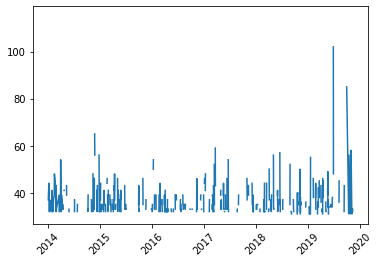

In [51]:
# Visualisation of data

plt.plot(df_wind['Date'],df_wind['Wind max speed (km/h)'])
plt.xticks(rotation = 45);

In [54]:
# Creation of the cleaned weather dataframe

weather_1 = pd.merge(df_temp, df_rain, how='inner', on=None, left_on='Date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

weather_1 = weather_1.dropna()

weather_1

,Date,Mean temp (°C),Tot precip (mm)
17889,2014-01-01,-19.6,0.0
17890,2014-01-02,-24.9,0.0
17891,2014-01-03,-21.3,1.0
17892,2014-01-04,-14.0,0.0
17893,2014-01-05,-5.2,8.0
...,...,...,...
19749,2019-11-09,-1.6,0.0
19750,2019-11-10,2.3,0.0
19751,2019-11-11,-4.4,8.8
19752,2019-11-12,-7.8,7.5


In [65]:
weather_2 = pd.merge(weather_1, df_snow, how='outer', on=None, left_on='Date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

# I have not used calendar dataframe for snow
weather_2 = weather_2.dropna()

weather_2

,Date,Mean temp (°C),Tot precip (mm),Snow on ground (cm)
0,2014-01-01,-19.6,0.0,0.0
1,2014-01-02,-24.9,0.0,0.0
2,2014-01-03,-21.3,1.0,0.0
3,2014-01-04,-14.0,0.0,0.0
4,2014-01-05,-5.2,8.0,0.0
...,...,...,...,...
2138,2019-11-09,-1.6,0.0,0.0
2139,2019-11-10,2.3,0.0,0.0
2140,2019-11-11,-4.4,8.8,0.0
2141,2019-11-12,-7.8,7.5,16.0


In [66]:
cleaned_weather = pd.merge(weather_2, df_wind, how='outer', on=None, left_on='Date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

cleaned_weather

,Date,Mean temp (°C),Tot precip (mm),Snow on ground (cm),Wind max speed (km/h)
0,NaT,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3372,2019-11-09,-1.6,0.0,0.0,NaN
3373,2019-11-10,2.3,0.0,0.0,NaN
3374,2019-11-11,-4.4,8.8,0.0,32.0
3375,2019-11-12,-7.8,7.5,16.0,33.0


## Ridge regression

In [ ]:
# Not sure I use everything

import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split # use this
from sklearn.linear_model import Ridge # use this
from sklearn.model_selection import cross_val_predict # use this
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error # use this
from sklearn.preprocessing import scale # use this

In [ ]:
# merge the dataframe
Weather_Freq = pd.merge(Daily_BikeTravel, df_weather, how='inner', on=None, left_on='date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
Weather_Freq.drop(['Date'],axis='columns', inplace=True)
Weather_Freq.head()

In [ ]:
parameters = ['frequency', 'Mean temp (°C)','Total precip (mm)', 'Snow on ground (cm)', 'Wind max speed (km/h)']
y = Weather_Freq[parameters[0]]
X = Weather_Freq[parameters[1:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# Normalisation

X = scale(X, axis = 0)

In [ ]:
# find the alpha for which mse (mean square error) is minimal

train_mse = [] # will contain mse value for each alpha in (0:2000)

# alpha = 0

ridge = Ridge(alpha=0)  #creation of the model
predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)
alpha_min = 0  #initialize alpha_min
min_mse = mean_squared_error(y_train, predicted_r)  #initialize min_mse
train_mse.append(min_mse)

# alpha in (1:2000)

for alpha_i in range(1, 2000):
    ridge = Ridge(alpha=alpha_i)
    predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)
    mse_i = mean_squared_error(y_train, predicted_r)
    train_mse.append(mse_i)    
    if mse_i < min_mse:
        alpha_min = alpha_i
        min_mse = mse_i

In [ ]:
# Which alpha is optimal ?

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_mse)
ax.scatter([alpha_min], [min_mse], edgecolors=(0, 0, 0), color = 'r')
ax.set_xlabel('alpha')
ax.set_ylabel('Mean Square Error')
plt.show()
print("Optimized alpha : ", alpha_min)
print("Minimal mean square error :", mean_squared_error(y_train, predicted_r))

In [ ]:
# finally we do the regression with the chosen alpha and take a look at the coefficient
        
ridge = Ridge(alpha=alpha_min)
predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)

ridge.fit(X_train, y_train)

ridge.coef_

# Influence of individuals parameters

## Influence of Temperature

In [38]:
Temp_Freq = Weather_Freq[['date','count','Mean temp (°C)']]
Temp_Freq.head()

NameError: name 'Weather_Freq' is not defined

In [ ]:
# Still have to figure out how to plot number of bike in function of T
# Maybe have to exclude month for which it's closed

In [ ]:
Temp_Count = Temp_Freq.groupby(['Mean temp (°C)']).size().reset_index(name='T_count')
Temp_Count

## Influence of Rain

In [ ]:
Rain_Freq = Weather_Freq[['date','count','Tot precip (mm)']]
Rain_Count = Rain_Freq.groupby(['Tot precip (mm)']).size().reset_index(name='R_count')

## Influence of Snow

In [ ]:
Snow_Freq = Weather_Freq[['date','count','Snow on ground (cm)']]
Snow_Count = Snow_Freq.groupby(['Snow on ground (cm)']).size().reset_index(name='S_count')

## Influence of Wind

In [ ]:
Wind_Freq = Weather_Freq[['date','count','Wind max speed (km/h)']]
Wind_Count = Wind_Freq.groupby(['Wind max speed (km/h)']).size().reset_index(name='W_count')

# Sketch of stuff

In [ ]:
# Some values are still missing
# finish to clean the data
# do the regression

Text(0, 0.5, 'number of 10^4 bike travel of the month ')

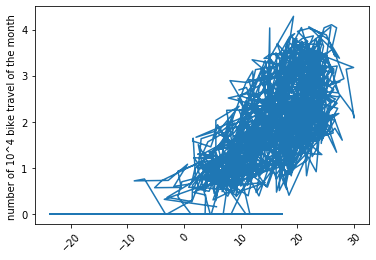

In [54]:
Temp_Freq = Weather_Freq[['date','count','Mean temp (°C)']]

plt.plot(Temp_Freq['Mean temp (°C)'],Temp_Freq['count']/10000)
plt.xticks(rotation = 45);

axes = plt.gca()
axes.set_ylabel('number of 10^4 bike travel of the day ')

# ça fait un gros truc moche